In [1]:
# Standard Imports
import numpy as np
import pandas as pd

In [2]:
# list of csv's with stored tweets
file_path_list = []
base = 'bestactor16_tweets_ba'
extensions = ['', '2', '3', '4', '5', '6', '7', '8']
def create_filepath(base, ext):
    """create the csv names of saved tweet text
    """
    for e in ext:
        file_path = base + e + '.csv'
        file_path_list.append(file_path)
    return file_path_list

In [3]:
file_path_list = []

file_paths = create_filepath(base, extensions)
file_paths

['bestactor16_tweets_ba.csv',
 'bestactor16_tweets_ba2.csv',
 'bestactor16_tweets_ba3.csv',
 'bestactor16_tweets_ba4.csv',
 'bestactor16_tweets_ba5.csv',
 'bestactor16_tweets_ba6.csv',
 'bestactor16_tweets_ba7.csv',
 'bestactor16_tweets_ba8.csv']

In [12]:
def combine_data_frames(filepaths):
    """Load saved csvs of tweets and combine into one dataframe
    """
    df = None
    for fp in filepaths:
        if df is None:
            df = pd.read_csv(fp)
        else:
            df_2 = pd.read_csv(fp)
            df = df.append(df_2)
    return df

In [13]:
df = combine_data_frames(file_paths)

In [14]:
df.shape

(25709, 3)

In [15]:
df.head()

,id,created_at,text
0,692517124036624384,2016-01-28 01:18:43,RT @HayhayTV: Hi vongj anh Leonardo DiCaprio q...
1,692517122849796097,2016-01-28 01:18:43,RT @ClearsMaster: @MyDaniBoi AH NO LE LLEGAN A...
2,692517122531024897,2016-01-28 01:18:43,RT @Ricardocomun: @Ricardocomun: No les quiero...
3,692517122296127488,2016-01-28 01:18:42,RT @CarmenExpress: Someone please give Leonard...
4,692517122119839744,2016-01-28 01:18:42,RT @elhuevocr: The Oscars\nNominated: \nLeonar...


In [16]:
df.text = df.text.str.decode('utf-8')

In [17]:
# Try to do it all
import re

#start process_tweet
def processTweet(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    # Remove www.* or https://* to U
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(https://[^\s]+))','',tweet)
    #Remove @User
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    
    return tweet

def text_to_word(text): # pass in a df column
    
    tweet_text = [processTweet(x) for x in text]
    
    return tweet_text

In [18]:
ptweets = text_to_word(df.text)

In [19]:
ptweets[:5]

[u"rt hi vongj anh leonardo dicaprio qua c\u01a1n th\xe1i c\u1ef1c \u0111\u1ebfn h\u1ed3i th\xe1i lai :'( link: ",
 u'rt ah no le llegan a hacer eso a dicaprio y les prendo fuego donde sea que se entreguen los oscars (?',
 u'rt no les quiero arruinar el final de "the revenant" pero al final... dicaprio no se lleva el \xf3scar :(',
 u'rt someone please give leonardo dicaprio an oscar already. oscar2016',
 u'rt the oscars nominated: leonardo dicaprio leonardo dicaprio leonardo dicaprio leonardo dicaprio winner: bb-8']

In [21]:
# Let's try nltk Vade for some sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [22]:
pos_list = []
# Get Vader positivity score on each tweet
for p in ptweets:
     ss = sid.polarity_scores(p)
     pos_list.append(ss['pos'])

In [23]:
# Add Vader positivity scores as column in df
df['positivity'] = pos_list

In [24]:
df.head()

,id,created_at,text,positivity
0,692517124036624384,2016-01-28 01:18:43,RT @HayhayTV: Hi vongj anh Leonardo DiCaprio q...,0.000
1,692517122849796097,2016-01-28 01:18:43,RT @ClearsMaster: @MyDaniBoi AH NO LE LLEGAN A...,0.000
2,692517122531024897,2016-01-28 01:18:43,RT @Ricardocomun: @Ricardocomun: No les quiero...,0.000
3,692517122296127488,2016-01-28 01:18:42,RT @CarmenExpress: Someone please give Leonard...,0.204
4,692517122119839744,2016-01-28 01:18:42,RT @elhuevocr: The Oscars\nNominated: \nLeonar...,0.226


In [25]:
sorted_df = df.sort('positivity', ascending=False)

In [26]:
sorted_df.head()

,id,created_at,text,positivity
2896,693569061947600898,2016-01-30 22:58:44,RT @ebruclawuz: https://t.co/2d3r8gXTtr :D :D,0.868
113,693951575807623169,2016-02-01 00:18:43,RT @dgoldenbergscot: Great https://t.co/RxvHtC...,0.804
2412,697221874598723584,2016-02-10 00:53:43,RT @anamaaee: Love wins 😏😬 https://t.co/So9Z...,0.798
2748,693075806449487874,2016-01-29 14:18:43,RT @WadihAnton: Genial!\nhttps://t.co/z7ambxgDUq,0.756
405,697496186312380416,2016-02-10 19:03:44,RT @aishaalfa: leodicaprioofficial loves a goo...,0.745


In [27]:
top_twenty = sorted_df['text'][:20]

In [28]:
for tt in top_twenty:
    print tt

RT @ebruclawuz: https://t.co/2d3r8gXTtr  :D :D
RT @dgoldenbergscot: Great https://t.co/RxvHtC0loT
RT @anamaaee: Love wins 😏😬 https://t.co/So9Z4W8VhF
RT @WadihAnton: Genial!
https://t.co/z7ambxgDUq
RT @aishaalfa: leodicaprioofficial loves a good giggle! #jokes #Oscars #Leo https://t.co/yr0dxZwMXr
RT @LoserLane: The Revenant was amazing. Definitely Oscar award winning worthy Leo.
RT @jessicaluvtech: SAG Awards winner @LeoDiCaprio celebrates with hug from #KateWinslet https://t.co/hCgEUamlUO
RT @jusboymusic: Thanks #TopNewFollowers @Bob_Oscar @Gabrielle_Faust @C_E_Lawrence Happy to connect :)
RT @JLawDerpel: Don't hate me, but I hope Brie Larson wins best actress at the Oscars. Room was amazing. I hope that movie wins many awards.
RT @leo_tgtbt: @eddieh1114 @YahBoyCourage @Twinky_2012 oscar for sure lmao
RT @alouise_xox: hope Leo wins the best male leading actor Oscar award
RT @AdiWriter: So, yeah, I'm completely at peace if Hardy sweeps Best Supporting Oscar.
RT @MarianaR: @SashaReuther 

In [129]:
# Try to do counts of each actor in a category

In [29]:
def label_nom_ba(row):
    """Determine if one of the best actor nominees is mentioned in a given tweet"""
    if 'Redmayne' in row.text:
       return 'Redmayne'
    if 'Damon' in row.text:
       return 'Damon'
    if 'Cranston' in row.text:
       return 'Cranston'
    if 'Fassbender' in row.text:
       return 'Fassbender'
    if 'Leo' in row.text:
       return 'Leo' 
    else:
       return 'None'

In [30]:
def label_nom_bas(row):
    """Determine if one of the best actress nominees is mentioned in a given tweet"""
    if 'Rampling' in row.text:
       return 'Rampling'
    if 'Blanchett' in row.text:
       return 'Blanchett'
    if 'Lawrence' in row.text:
       return 'Lawrence'
    if 'Ronan' in row.text:
       return 'Ronan'
    if 'Larson' in row.text:
       return 'Larson' 
    else:
       return 'None'

In [31]:
def label_nom_bsa(row):
    """Determine if one of the best supporting actor nominees is mentioned in a given tweet"""
    if 'Ruffalo' in row.text:
       return 'Ruffalo'
    if 'Hardy' in row.text:
       return 'Hardy'
    if 'Bale' in row.text:
       return 'Bale'
    if 'Rylance' in row.text:
       return 'Rylance'
    if 'Stallone' in row.text:
       return 'Stallone' 
    else:
       return 'None'

In [32]:
def label_nom_bsas(row):
    """Determine if one of the best supporting actress nominees is mentioned in a given tweet"""
    if 'McAdams' in row.text:
       return 'McAdams'
    if 'Leigh' in row.text:
       return 'Leigh'
    if 'Winslet' in row.text:
       return 'Winslet'
    if 'Mara' in row.text:
       return 'Mara'
    if 'Vikander' in row.text:
       return 'Vikander' 
    else:
       return 'None'

In [33]:
df['nom_mention_ba'] = df.apply(lambda row: label_nom_ba(row),axis=1)
df['nom_mention_bas'] = df.apply(lambda row: label_nom_bas(row),axis=1)
df['nom_mention_bsa'] = df.apply(lambda row: label_nom_bsa(row),axis=1)
df['nom_mention_bsas'] = df.apply(lambda row: label_nom_bsas(row),axis=1)

In [34]:
df.head()

,id,created_at,text,positivity,nom_mention_ba,nom_mention_bas,nom_mention_bsa,nom_mention_bsas
0,692517124036624384,2016-01-28 01:18:43,RT @HayhayTV: Hi vongj anh Leonardo DiCaprio q...,0.000,Leo,None,None,None
1,692517122849796097,2016-01-28 01:18:43,RT @ClearsMaster: @MyDaniBoi AH NO LE LLEGAN A...,0.000,None,None,None,None
2,692517122531024897,2016-01-28 01:18:43,RT @Ricardocomun: @Ricardocomun: No les quiero...,0.000,None,None,None,None
3,692517122296127488,2016-01-28 01:18:42,RT @CarmenExpress: Someone please give Leonard...,0.204,Leo,None,None,None
4,692517122119839744,2016-01-28 01:18:42,RT @elhuevocr: The Oscars\nNominated: \nLeonar...,0.226,Leo,None,None,None


In [35]:
df_agg_ba = df.groupby('nom_mention_ba').positivity.sum()

In [37]:
df_agg_ba

nom_mention_ba
Cranston       13.132
Damon          41.277
Fassbender     16.735
Leo           893.258
None          981.061
Redmayne       45.764
Name: positivity, dtype: float64

In [38]:
df_agg_bas = df.groupby('nom_mention_bas').positivity.sum()
df_agg_bas

nom_mention_bas
Blanchett      24.758
Larson         77.437
Lawrence       77.908
None         1748.045
Rampling       46.817
Ronan          16.262
Name: positivity, dtype: float64

In [39]:
df_agg_bsa = df.groupby('nom_mention_bsa').positivity.sum()
df_agg_bsa

nom_mention_bsa
Bale          15.213
Hardy        143.438
None        1688.345
Ruffalo       52.532
Rylance        7.915
Stallone      83.784
Name: positivity, dtype: float64

In [40]:
df_agg_bsas = df.groupby('nom_mention_bsas').positivity.sum()
df_agg_bsas

nom_mention_bsas
Leigh         13.476
Mara          21.332
McAdams       23.142
None        1797.880
Vikander      60.644
Winslet       74.753
Name: positivity, dtype: float64

In [51]:
#from __future__ import division
def find_percents(pos_scores):
    """Takes raw totals of tweet mentions and finds the proportion
    """
    percents = []
    total = 0
    for p in pos_scores:
        total += p
    for p in pos_scores:
        percents.append(float(p/total))
        
    return percents

In [46]:
pos_values_ba = []
ba_noms = ['Leo', 'Redmayne', 'Damon', 'Fassbender', 'Cranston']
for n in ba_noms:
    pos_values_ba.append(df_agg_ba[n])

In [54]:
pos_values_bas = []
bas_noms = ['Blanchett', 'Larson', 'Lawrence', 'Ronan', 'Rampling']
for n in bas_noms:
    pos_values_bas.append(df_agg_bas[n])

In [58]:
pos_values_bsa = []
bsa_noms = ['Hardy', 'Bale', 'Ruffalo', 'Rylance', 'Stallone']
for n in bsa_noms:
    pos_values_bsa.append(df_agg_bsa[n])

In [60]:
pos_values_bsas = []
bsas_noms = ['Leigh', 'McAdams', 'Mara', 'Vikander', 'Winslet']
for n in bsas_noms:
    pos_values_bsas.append(df_agg_bsas[n])

In [55]:
# Best actor chance of winning
percents_ba = find_percents(pos_values_ba)
percents_ba

[0.8842685261630262,
 0.045303445176337546,
 0.04086160096459413,
 0.016566584105978683,
 0.012999843590063466]

In [56]:
# Best actress chance of winning
percents_bas = find_percents(pos_values_bas)
percents_bas

[0.10180852201231995,
 0.3184322852842726,
 0.32036910626608894,
 0.06687172570338262,
 0.19251836073393586]

In [59]:
# Best supporting actor chance of winning
percents_bsa = find_percents(pos_values_bsa)
percents_bsa

[0.473577168666345,
 0.05022748132936264,
 0.1734404817717792,
 0.02613228914230627,
 0.2766225790902069]

In [61]:
# Best supporting actress chance of winning
percents_bsas = find_percents(pos_values_bsas)
percents_bsas

[0.06969852131142448,
 0.11969153904637762,
 0.11033013183550809,
 0.31365368999777604,
 0.3866261178089138]

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

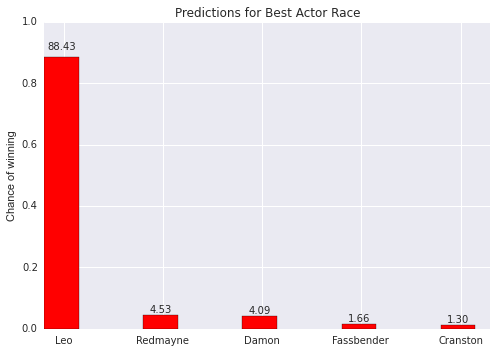

In [80]:
# Make plot of best actor results
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, percents_ba, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Chance of winning')
ax.set_title('Predictions for Best Actor Race')
ax.set_xticks(ind + width - .15)
ax.set_xticklabels(('Leo', 'Redmayne', 'Damon', 'Fassbender', 'Cranston'))
ax.set_ylim(0,1)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % float(height*100),
                ha='center', va='bottom')

autolabel(rects1)
